# **[Loan Eligible Classification]**

### Proyek Machine Learning Terapan: Predictive Analytics
by Fajar Tirtayasa

<img src='https://drive.google.com/uc?export=view&id=1Fp9fKdTmkhfDt2SAgeHNo0L0oiKHL78y'>

## **[Business Understanding]**
Perusahaan *Dream Housing Finance* menangani semua pinjaman rumah. Mereka memiliki riwayat pemberian pinjaman untuk semua daerah perkotaan, semi-perkotaan, dan pedesaan. Pelanggan pertama mengajukan pinjaman rumah setelah perusahaan itu memvalidasi kelayakan pelanggan untuk pinjaman.

Perusahaan ingin mengotomatisasi proses kelayakan pinjaman (secara real-time) berdasarkan detail pelanggan yang diberikan saat mengisi formulir aplikasi online. Rincian tersebut adalah Jenis Kelamin, Status Perkawinan, Pendidikan, Jumlah Tanggungan, Penghasilan, Jumlah Pinjaman, Riwayat Kredit, dan lain-lain. Untuk mengotomatisasi proses ini, mereka telah memberikan masalah untuk mengidentifikasi segmen pelanggan, yang berhak atas jumlah pinjaman sehingga mereka dapat secara khusus menargetkan pelanggan tersebut.

## **[Data Understanding]**

Source Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?select=loan-train.csv

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
#loading data
df = pd.read_csv('/Data Science/Dicoding/Loan Eligible Classification/loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


Informasi mengenai kolom dataframe:
- **Loan_ID**: ID unik pinjaman.
- **Gender**: Male/Female.
- **Married**: Status pernikahan peminjam (Yes/No).
- **Dependents**: Banyaknya tanggungan peminjam.
- **Education**: Status pendidikan peminjam (Graduate/Under Graduate).
- **Self_Employed**: Status wiraswasta (Yes/No).
- **ApplicantIncome**: Pendapatan peminjam.
- **CoapplicantIncome**: Pendapatan pendamping peminjam.
- **LoanAmount**: Banyaknya pinjaman (dalam ribuan).
- **Loan_Amount_Term**: Jangka waktu pinjaman (dalam bulan).
- **Credit_History**: Riwayat credit memenuhi pedoman {1:'Good', 0:'Bad'}.
- **Property_Area**: Urban/Semi-Urban/Rural.
- **Loan_Status**: Status penerimaan pinjaman (Yes/No).

### Exploratory Data Analysis: Descriptive Statistic

In [66]:
#melihat banyaknya baris dan kolom pada dataframe
df.shape

(614, 13)

In [67]:
#mengecek beberapa sampel data
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
553,LP002788,Male,Yes,0,Not Graduate,No,2454,2333.00,181.00,360.00,0.00,Urban,N
251,LP001836,Female,No,2,Graduate,No,3427,0.00,138.00,360.00,1.00,Urban,N
436,LP002398,Male,No,0,Graduate,No,1926,1851.00,50.00,360.00,1.00,Semiurban,Y
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.00,182.00,180.00,1.00,Urban,Y
466,LP002500,Male,Yes,3+,Not Graduate,No,2947,1664.00,70.00,180.00,0.00,Urban,N


In [68]:
#mengecek banyaknya Non-Null value dan tipe data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
#melihat banyaknya Null value di setiap kolom
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
#mengecek ada tidaknya data yang duplikat
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [71]:
#mengecek unique value untuk beberapa kolom dengan representasi tipe data kategorikal
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'Loan_Amount_Term', 'Property_Area', 'Loan_Status']
for col in cat_col:
    print(f'Unique kolom {col}: ', df[col].unique())

Unique kolom Gender:  ['Male' 'Female' nan]
Unique kolom Married:  ['No' 'Yes' nan]
Unique kolom Dependents:  ['0' '1' '2' '3+' nan]
Unique kolom Education:  ['Graduate' 'Not Graduate']
Unique kolom Self_Employed:  ['No' 'Yes' nan]
Unique kolom Loan_Amount_Term:  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Unique kolom Property_Area:  ['Urban' 'Rural' 'Semiurban']
Unique kolom Loan_Status:  ['Y' 'N']


In [72]:
#melihat statistik deskriptif (sebelum data preparation) untuk kolom dengan tipe data numerik
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [73]:
#melihat statistik deskriptif (sebelum data preparation) untuk kolom dengan tipe data object
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Beberapa informasi yang dapat diperoleh dari tahapan Descriptive Statistic di atas adalah:
- Dataset ini terdiri atas 614 baris dan 13 kolom (5 kolom dengan tipe data numerik, dan 8 kolom dengan tipe data object).
- Terdapat beberapa kolom yang memiliki *missing value*, yakni kolom 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', dan 'Credit_History'. Dengan demikian, nantinya perlu adanya proses *handling missing value*.
- Tidak terdapat data yang duplikat pada dataset.
- Terdapat beberapa kolom yang baiknya dilakukan proses perubahan tipe data menjadi *integer*, yakni untuk kolom 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', dan 'Credit_History'.
- Sebelum dilakukan pemodelan, kolom 'Loan_ID' dapat di-drop karena tidak dibutuhkan.

### Exploratory Data Analysis: Univariate Analysis

#### **Categorical Data**

In [74]:
#membuat salinan dataframe untuk memudahkan Univariate Analysis
df2 = df.copy()
df2 = df2.fillna('Missing')

         Banyak sampel  Persentase
Male               489       79.64
Female             112       18.24
Missing             13        2.12


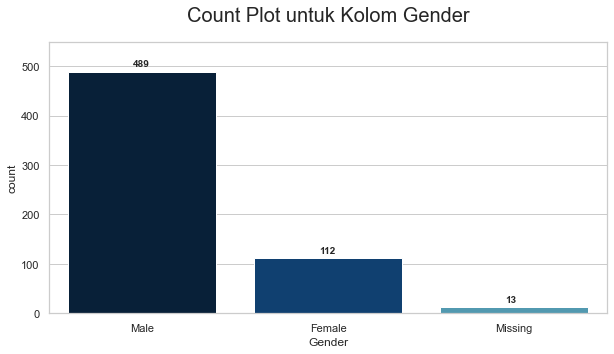

In [75]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Gender'
count = df2['Gender'].value_counts()
percentage = 100*df2['Gender'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Gender'
sns.set_style('whitegrid')
sns.countplot(x='Gender', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=550)
plt.title('Count Plot untuk Kolom Gender', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

         Banyak sampel  Persentase
Yes                398       64.82
No                 213       34.69
Missing              3        0.49


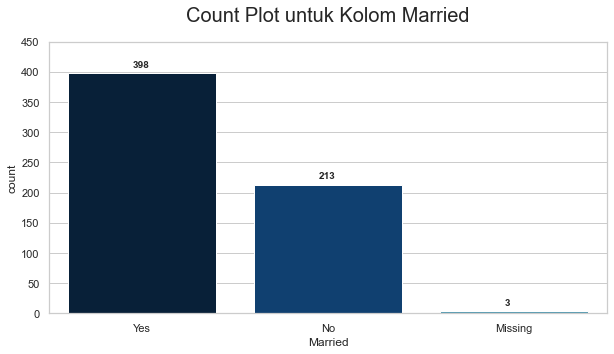

In [76]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Married'
count = df2['Married'].value_counts()
percentage = 100*df2['Married'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Married'
sns.set_style('whitegrid')
sns.countplot(x='Married', data=df2, palette='ocean',
              order=['Yes', 'No', 'Missing'])
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=450)
plt.title('Count Plot untuk Kolom Married', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

         Banyak sampel  Persentase
0                  345       56.19
1                  102       16.61
2                  101       16.45
3+                  51        8.31
Missing             15        2.44


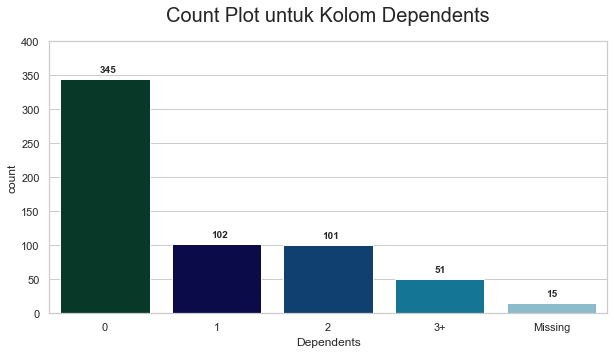

In [77]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Dependents'
count = df2['Dependents'].value_counts()
percentage = 100*df2['Dependents'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Dependents'
sns.set_style('whitegrid')
sns.countplot(x='Dependents', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=400)
plt.title('Count Plot untuk Kolom Dependents', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

              Banyak sampel  Persentase
Graduate                480       78.18
Not Graduate            134       21.82


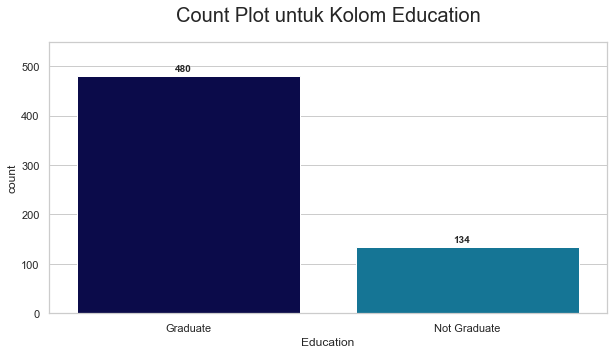

In [78]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Education'
count = df2['Education'].value_counts()
percentage = 100*df2['Education'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Education'
sns.set_style('whitegrid')
sns.countplot(x='Education', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=550)
plt.title('Count Plot untuk Kolom Education', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

         Banyak sampel  Persentase
No                 500       81.43
Yes                 82       13.36
Missing             32        5.21


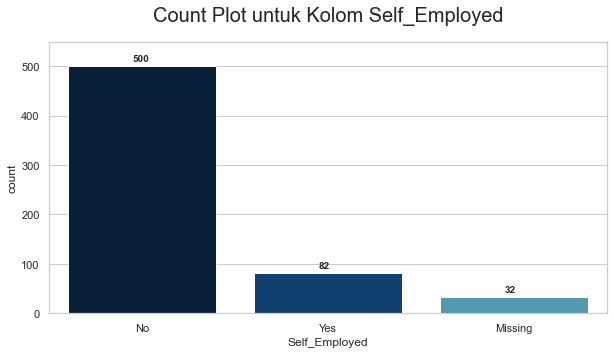

In [79]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Self_Employed'
count = df2['Self_Employed'].value_counts()
percentage = 100*df2['Self_Employed'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Self_Employed'
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=550)
plt.title('Count Plot untuk Kolom Self_Employed', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

         Banyak sampel  Persentase
360.0              512       83.39
180.0               44        7.17
480.0               15        2.44
Missing             14        2.28
300.0               13        2.12
240.0                4        0.65
84.0                 4        0.65
120.0                3        0.49
60.0                 2        0.33
36.0                 2        0.33
12.0                 1        0.16


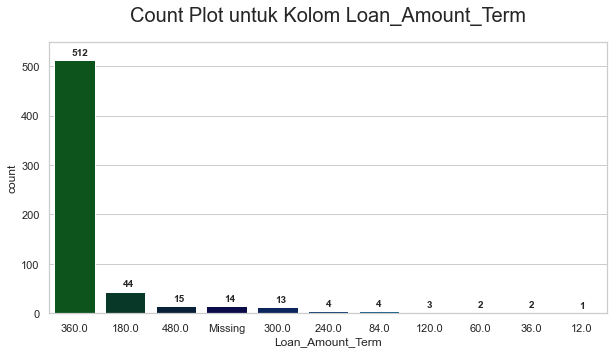

In [80]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Loan_Amount_Term'
count = df2['Loan_Amount_Term'].value_counts()
percentage = 100*df2['Loan_Amount_Term'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Loan_Amount_Term'
sns.set_style('whitegrid')
sns.countplot(x='Loan_Amount_Term', data=df2, palette='ocean',
              order=[360.0, 180.0, 480.0, 'Missing', 300.0,
                     240.0, 84.0, 120.0, 60.0, 36.0, 12.0])
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=550)
plt.title('Count Plot untuk Kolom Loan_Amount_Term', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

         Banyak sampel  Persentase
1.0                475       77.36
0.0                 89       14.50
Missing             50        8.14


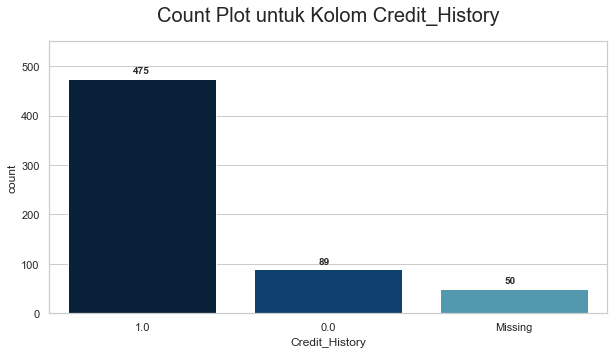

In [81]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Credit_History'
count = df2['Credit_History'].value_counts()
percentage = 100*df2['Credit_History'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Credit_History'
sns.set_style('whitegrid')
sns.countplot(x='Credit_History', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=550)
plt.title('Count Plot untuk Kolom Credit_History', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

           Banyak sampel  Persentase
Semiurban            233       37.95
Urban                202       32.90
Rural                179       29.15


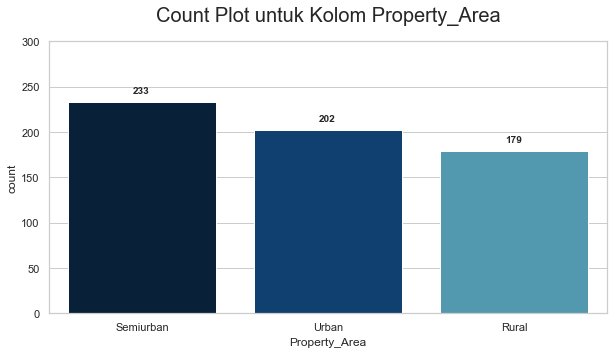

In [82]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Property_Area'
count = df2['Property_Area'].value_counts()
percentage = 100*df2['Property_Area'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Property_Area'
sns.set_style('whitegrid')
sns.countplot(x='Property_Area', data=df2, palette='ocean',
              order=['Semiurban', 'Urban', 'Rural'])
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=300)
plt.title('Count Plot untuk Kolom Property_Area', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

   Banyak sampel  Persentase
Y            422       68.73
N            192       31.27


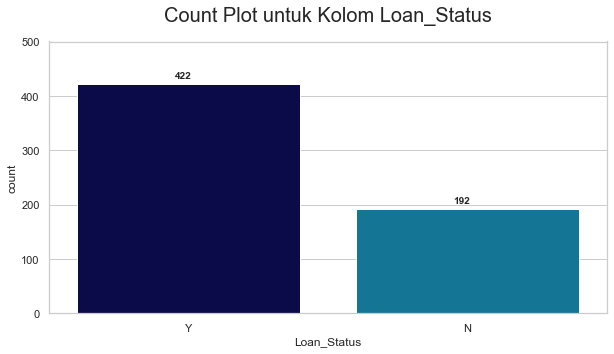

In [83]:
#membuat dataframe yang memuat banyak sampel dan perentase tiap kategori kolom 'Loan_Status'
count = df2['Loan_Status'].value_counts()
percentage = 100*df2['Loan_Status'].value_counts(normalize=True)
df2_col = pd.DataFrame({'Banyak sampel':count, 'Persentase':round(percentage,2)})
print(df2_col)

#membuat count plot untuk kolom 'Loan_Status'
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', data=df2, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.05, v+10, str(v), fontweight='bold')
plt.ylim(ymax=500)
plt.title('Count Plot untuk Kolom Loan_Status', pad=20, fontsize=20)
plt.gcf().set_size_inches(10,5)
plt.show()

#### **Numerical Data**

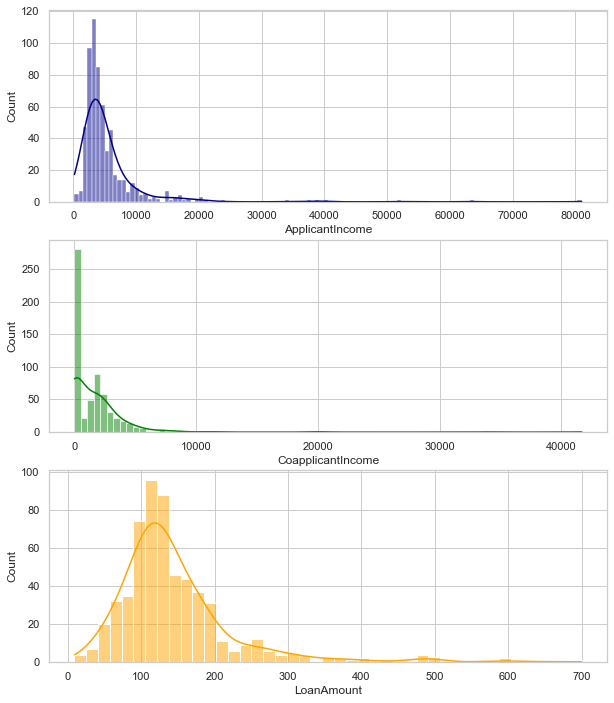

In [84]:
#membuat histogram untuk melihat distribusi data pada kolom numerik
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')
plt.show()

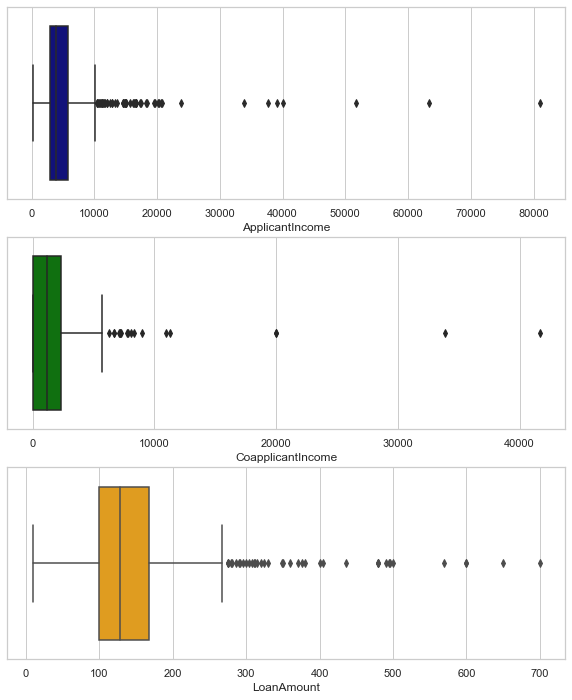

In [85]:
#membuat box plot untuk mendeteksi outlier pada kolom numerik
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot(x=df['ApplicantIncome'], ax=ax[0], color='darkblue')
sns.boxplot(x=df['CoapplicantIncome'], ax=ax[1], color='green')
sns.boxplot(x=df['LoanAmount'], ax=ax[2], color='orange')
plt.show()

Beberapa informasi yang dapat diperoleh dari tahapan Univariate Analysis di atas adalah:
- Secara umum, untuk kolom dengan tipe data kategorikal, hampir semua kolom memiliki kategori dominan yang ditunjukkan dengan persentase >50%. Secara khusus untuk kolom 'Loan_Status', perbandingan kategorinya adalah 69:31 (imbalance), artinya perlu dilakukan perlakuan khusus agar nantinya model yang dibuat tidak ada kecenderungan prediksi berlebih ke kategori tertentu.
- Terdapat outlier pada kolom-kolom dengan tipe data numerik, yakni kolom 'ApplicantIncome', 'CoapplicantIncome', dan 'LoanAmount'. Nantinya akan dilakukan proses **handling outlier** pada tahap *data preparation*.

### Exploratory Data Analysis: Multivariate Analysis

#### **Categorical Data**

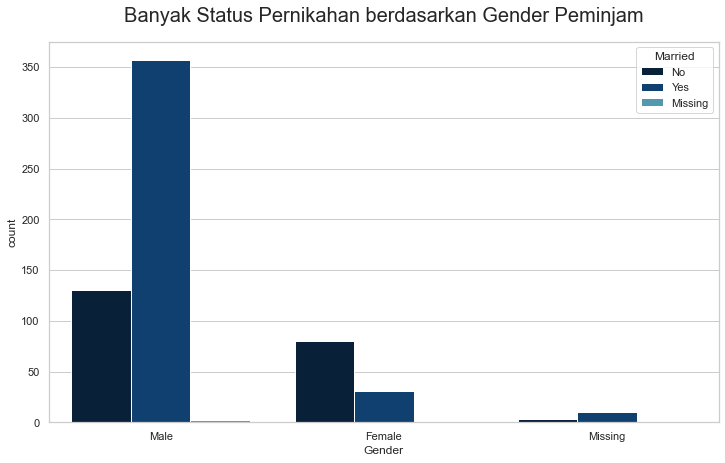

In [86]:
#melihat banyaknya status pernikahan berdasarkan gender peminjam
plt.figure(figsize=(12,7))
sns.countplot(x='Gender', data=df2, hue='Married', palette='ocean')
plt.title('Banyak Status Pernikahan berdasarkan Gender Peminjam',
          pad=20, fontsize=20)
plt.legend(title='Married', loc='upper right')
plt.show()

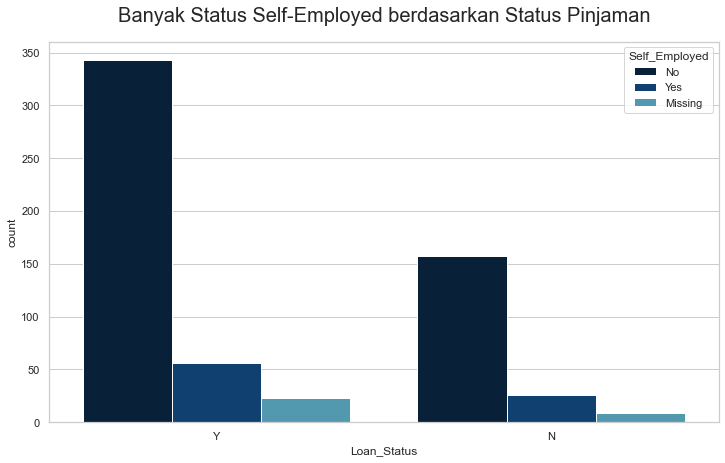

In [87]:
#melihat banyaknya status self-employed berdasarkan status pinjaman
plt.figure(figsize=(12,7))
sns.countplot(x='Loan_Status', data=df2, hue='Self_Employed', palette='ocean')
plt.title('Banyak Status Self-Employed berdasarkan Status Pinjaman',
          pad=20, fontsize=20)
plt.show()

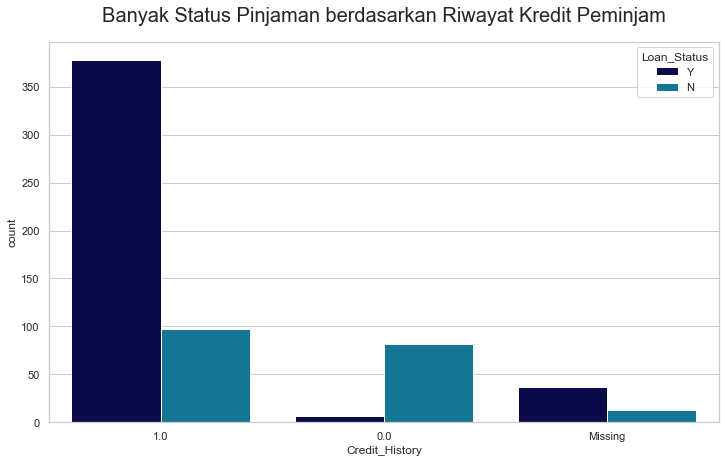

In [88]:
#melihat banyaknya status pengajuan pinjaman berdasarkan riwayat kredit peminjam
plt.figure(figsize=(12,7))
sns.countplot(x='Credit_History', data=df2, hue='Loan_Status', palette='ocean')
plt.title('Banyak Status Pinjaman berdasarkan Riwayat Kredit Peminjam',
          pad=20, fontsize=20)
plt.show()

#### **Numerical Data**

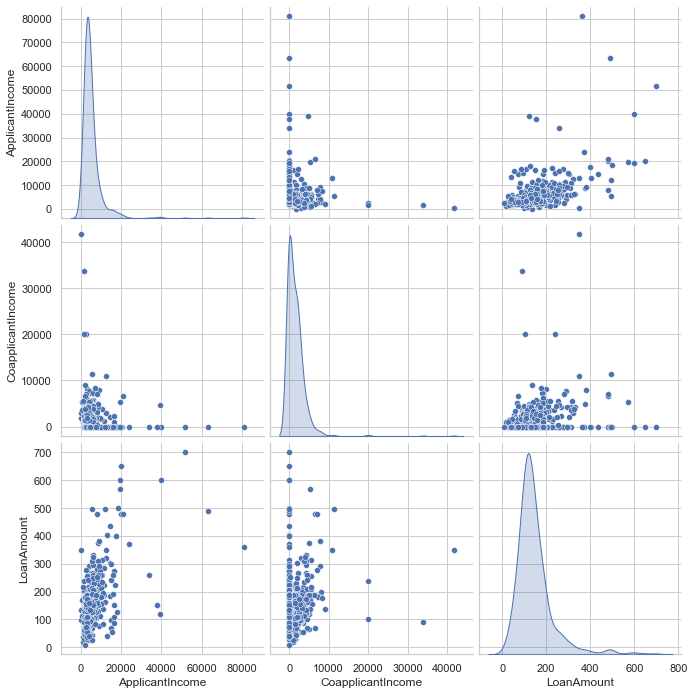

In [89]:
df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

#melihat distribusi pada beberapa kolom dengan tipe data numerik
sns.pairplot(df_num, diag_kind='kde')
plt.gcf().set_size_inches(10,10)
plt.show()

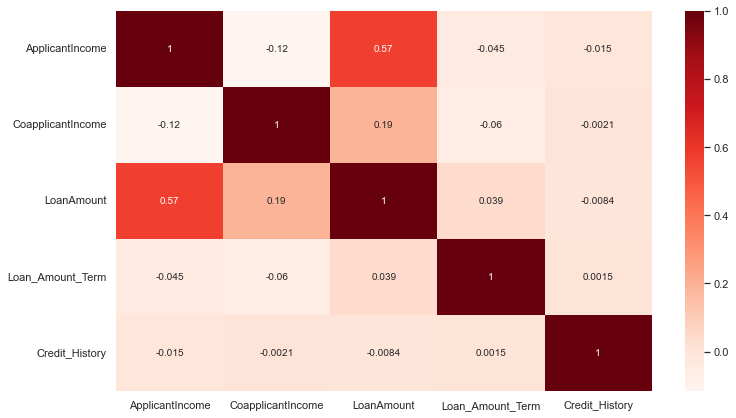

In [90]:
#membuat heatmap korelasi antar variabel numerik
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(), annot=True, cmap='Reds')
plt.show()

Beberapa informasi yang dapat diperoleh dari tahapan Multivariate Analysis di atas adalah:
- Untuk peminjam dengan gender laki-laki didominasi oleh yang sudah menikah. Hal ini bertolak belakang dengan peminjam dengan gender perempuan. Oleh karenanya, nantinya missing values pada kolom gender akan diisi dengan 'Male' karena memiliki kemiripan dengan gender laki-laki apabila dilihat dari status pernikahan.
- Riwayat peminjam yang buruk cenderung ditolak pengajuan pinjamannya. Karena missing value dari riwayat peminjam didominasi oleh yang diterima pinjamannya, maka nantinya missing value ini akan diisi dengan nilai 1 (Good).
-Terdapat korelasi yang sedang antara kolom 'LoanAmount' dengan 'ApplicantIncome'.

## **[Data Preparation]**

#### **Handling Missing Values**

In [91]:
#handling missing values untuk kolom dengan tipe data kategorikal
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

#handling missing values untuk kolom dengan tipe data numerikal
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [92]:
#mengecek kembali banyaknya missing value di setiap kolom
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### **Mengganti Tipe Data**

In [93]:
#mengganti beberapa tipe data kolom
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('int64')
df['LoanAmount'] = df['LoanAmount'].astype('int64')
df['Credit_History'] = df['Credit_History'].astype('int64')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')

#mengembalikan tipe data kolom 'Loan_Amount_Term' menjadi object
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')

In [94]:
#mengecek kembali Non-Null value dan tipe data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    object
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(4), object(9)
memory usage: 62.5+ KB


#### **Handling Outliers**

In [95]:
#handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR= Q3-Q1

df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

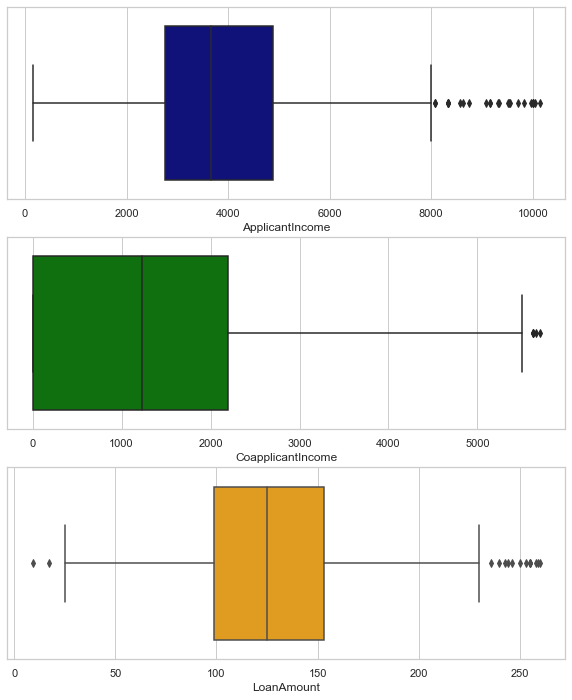

In [96]:
#melihat kembali boxplot untuk kolom dengan tipe data numerikal (pasca handling outliers)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot(x=df['ApplicantIncome'], ax=ax[0], color='darkblue')
sns.boxplot(x=df['CoapplicantIncome'], ax=ax[1], color='green')
sns.boxplot(x=df['LoanAmount'], ax=ax[2], color='orange')
plt.show()

In [97]:
#melihat kembali banyaknya baris dan kolom (pasca handling outliers)
df.shape

(457, 13)

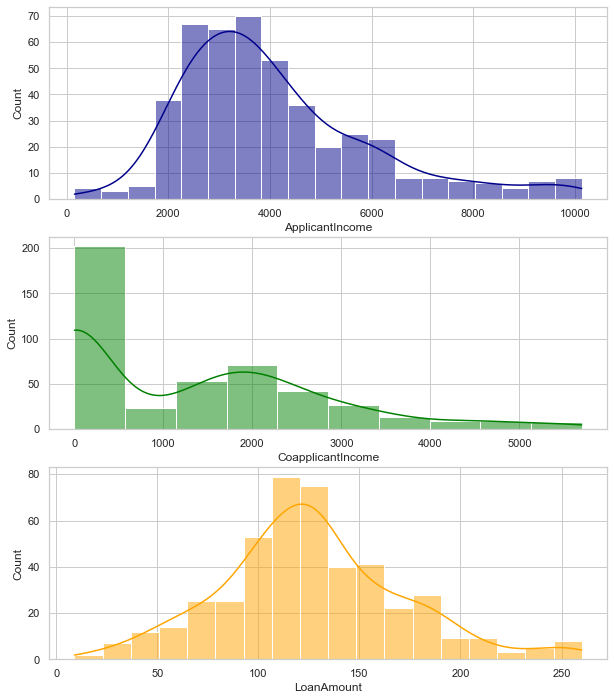

In [98]:
#melihat kembali distribusi data pada kolom numerik (pasca handling outliers)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')
plt.show()

#### **Feature Engineering : Transformation**

In [99]:
#feature engineering: transformasi data pada kolom numerik untung meminimalisir skewness
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

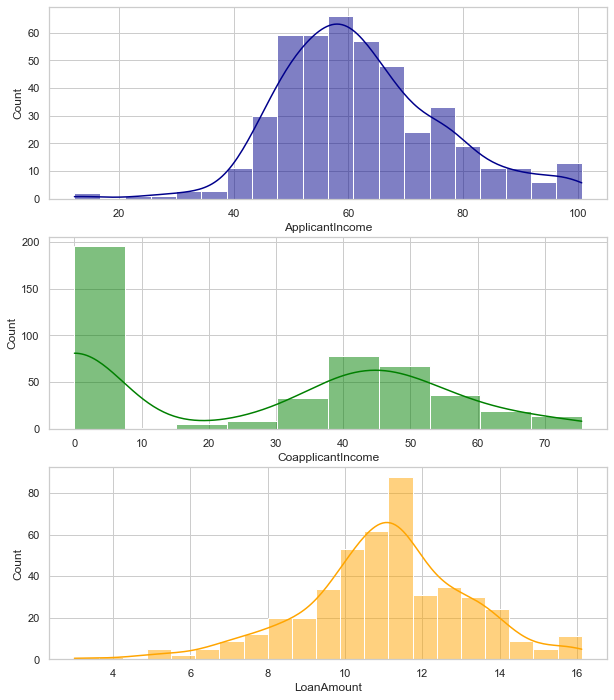

In [100]:
#melihat kembali distribusi data pada kolom numerik (pasca feature engineering)
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax=ax[0], color='darkblue')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax=ax[1], color='green')
sns.histplot(data=df, x='LoanAmount', kde=True, ax=ax[2], color='orange')
plt.show()

#### **Drop Kolom 'Loan_ID'**

In [101]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.48,0.00,11.31,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,67.70,38.83,11.31,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,54.77,0.00,8.12,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.82,48.56,10.95,360,1,Urban,Y
4,Male,No,0,Graduate,No,77.46,0.00,11.87,360,1,Urban,Y


#### **Encoding Fitur Kategorikal**

In [102]:
df = pd.get_dummies(df)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,76.48,0.00,11.31,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,67.70,38.83,11.31,1,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
2,54.77,0.00,8.12,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,50.82,48.56,10.95,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
4,77.46,0.00,11.87,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [103]:
#cok kolom pasca encoding
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12', 'Loan_Amount_Term_36',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_360', 'Loan_Amount_Term_480', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [104]:
#drop kolom yang tidak diperlukan
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

In [105]:
#rename beberapa kolom
df = df.rename(columns={'Gender_Male':'Gender',
                        'Married_Yes':'Married',
                        'Education_Graduate':'Education',
                        'Self_Employed_Yes':'Self_Employed',
                        'Loan_Status_Y':'Loan_Status'})

In [106]:
#cok kembali kolom pasca drop dan rename
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education', 'Self_Employed', 'Loan_Amount_Term_12',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_60', 'Loan_Amount_Term_84',
       'Loan_Amount_Term_120', 'Loan_Amount_Term_180', 'Loan_Amount_Term_240',
       'Loan_Amount_Term_300', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status'],
      dtype='object')

In [107]:
#melihat kembali banyaknya baris dan kolom (pasca encoding)
df.shape

(457, 26)

#### **Handling Imbalance Data**

In [108]:
#import library yang dibutuhkan
from imblearn.over_sampling import SMOTE

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X, y = SMOTE().fit_resample(X, y)

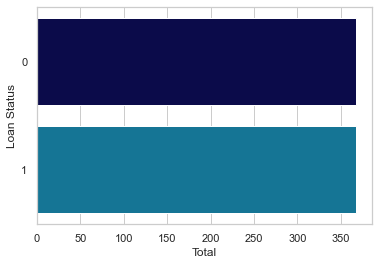

In [109]:
#membuat count plot untuk kolom 'Loan_Status'
sns.set_theme(style='whitegrid')
sns.countplot(y=y, data=df, palette="ocean")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

#### **Splitting Data**

In [110]:
#import beberapa library yang dibutuhkan
import sklearn
from sklearn.model_selection import train_test_split

#membagi dataset menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
print(f'Total sampel untuk data latih adalah {round(X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])*100)}%.')
print(f'Total sampel untuk data tes adalah {round(X_test.shape[0]/(X_train.shape[0] + X_test.shape[0])*100)}%.')

Total sampel untuk data latih adalah 70%.
Total sampel untuk data tes adalah 30%.


#### **Standarisasi**

In [112]:
#import library yang dibutuhkan
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

col_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[col_num] = ss.fit_transform(X_train[col_num])
X_test[col_num] = ss.fit_transform(X_test[col_num])

In [113]:
#mengecek hasil standarisasi X_train
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
536,-0.75,-0.95,-0.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
259,0.81,1.76,-1.40,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
137,-0.23,-0.95,-0.38,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
227,1.45,-0.95,1.52,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
687,-0.76,1.29,0.59,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#mengecek hasil standarisasi X_test
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
559,0.14,1.14,0.95,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33,-0.30,-1.01,-0.79,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
275,2.14,1.21,0.93,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
198,0.58,-1.01,0.17,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
192,-0.64,0.68,0.06,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## **[Modelling]**

#### **Melihat Performa Beberapa Model Secara General**

In [115]:
#import library yang dibutuhkan
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.74it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.85,0.85,0.85,0.85,0.04
CalibratedClassifierCV,0.85,0.84,0.84,0.85,0.12
KNeighborsClassifier,0.85,0.84,0.84,0.85,0.09
SVC,0.85,0.84,0.84,0.84,0.03
NuSVC,0.84,0.84,0.84,0.84,0.04
RandomForestClassifier,0.83,0.83,0.83,0.83,0.22
RidgeClassifier,0.83,0.83,0.83,0.83,0.02
LinearDiscriminantAnalysis,0.83,0.83,0.83,0.83,0.02
LGBMClassifier,0.83,0.83,0.83,0.83,0.08


Selanjutnya, data akan dilatih kembali secara manual dengan 5 jenis model yang konsisten memberikan hasil yang baik, di antaranya: **CalibratedClassifierCV**, **SVC**, **LogisticRegression**, **RandomForestClassifier**, dan **LinearSVC**.

In [116]:
#import library yang dibutuhkan
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#### **CalibratedClassifierCV**

In [117]:
CCCV = CalibratedClassifierCV()
CCCV = CCCV.fit(X_train, y_train)

#prediksi variabel y
y_pred_CCCV = CCCV.predict(X_test)

#cek akurasi train dan test model
score_train_CCCV = CCCV.score(X_train, y_train)
score_test_CCCV = CCCV.score(X_test, y_test)
print('Akurasi Train dari Model CalibratedClassifier adalah: ', score_train_CCCV)
print('Akurasi Tes dari Model CalibratedClassifier adalah: ', score_test_CCCV)

Akurasi Train dari Model CalibratedClassifier adalah:  0.8382066276803118
Akurasi Tes dari Model CalibratedClassifier adalah:  0.832579185520362


#### **SVC**

In [118]:
svc = SVC()
svc = svc.fit(X_train, y_train)

#prediksi variabel y
y_pred_SVC = svc.predict(X_test)

#cek akurasi train dan test model
score_train_SVC = svc.score(X_train, y_train)
score_test_SVC = svc.score(X_test, y_test)
print('Akurasi Train dari Model CalibratedClassifier adalah: ', score_train_SVC)
print('Akurasi Tes dari Model CalibratedClassifier adalah: ', score_test_SVC)

Akurasi Train dari Model CalibratedClassifier adalah:  0.8752436647173489
Akurasi Tes dari Model CalibratedClassifier adalah:  0.8235294117647058


In [119]:
#cari parameter SVC terbaik dengan GridSearchCV
param_SVC = {'C': [1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'sigmoid']}

search = GridSearchCV(SVC(), param_SVC)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [120]:
#latih model
SVC_new = SVC(C=1, gamma=1, kernel='rbf')
SVC_new = SVC_new.fit(X_train, y_train)

#prediksi variabel y
y_pred_SVC_new = SVC_new.predict(X_test)

#### **LogisticRegression**

In [121]:
LogReg = LogisticRegression()
LogReg = LogReg.fit(X_train, y_train)

#prediksi variabel y
y_pred_LogReg = LogReg.predict(X_test)

#cek akurasi train dan test model
score_train_LogReg = LogReg.score(X_train, y_train)
score_test_LogReg = LogReg.score(X_test, y_test)
print('Akurasi Train dari Model CalibratedClassifier adalah: ', score_train_LogReg)
print('Akurasi Tes dari Model CalibratedClassifier adalah: ', score_test_LogReg)

Akurasi Train dari Model CalibratedClassifier adalah:  0.8284600389863548
Akurasi Tes dari Model CalibratedClassifier adalah:  0.8280542986425339


In [122]:
#cari parameter LogReg terbaik dengan GridSearchCV
param_LogReg = {'penalty':['l1', 'l2'], 'C':np.logspace(-3,3,7)}

search = GridSearchCV(LogisticRegression(), param_LogReg)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 1000.0, 'penalty': 'l2'}


In [123]:
#latih model
LogReg_new = LogisticRegression(C=1000.0, penalty='l2')
LogReg_new = LogReg_new.fit(X_train, y_train)

#prediksi variabel y
y_pred_LogReg_new = LogReg_new.predict(X_test)

#### **RandomForestClassifier**

In [124]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train, y_train)

#prediksi variabel y
y_pred_RFC = RFC.predict(X_test)

#cek akurasi train dan test model
score_train_RFC = RFC.score(X_train, y_train)
score_test_RFC = RFC.score(X_test, y_test)
print('Akurasi Train dari Model RandomForestClassifier adalah: ', score_train_RFC)
print('Akurasi Tes dari Model RandomForestClassifier adalah: ', score_test_RFC)

Akurasi Train dari Model RandomForestClassifier adalah:  1.0
Akurasi Tes dari Model RandomForestClassifier adalah:  0.8280542986425339


In [125]:
#cari parameter RFC terbaik dengan GridSearchCV
param_RFC = {'n_estimators':[200, 500],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini', 'entropy']}

search = GridSearchCV(RandomForestClassifier(), param_RFC)
search.fit(X_train, y_train)

print(search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [126]:
#latih model
RFC_new = RandomForestClassifier(criterion='entropy', max_depth=8,
                                 max_features='sqrt', n_estimators=200)
RFC_new = RFC_new.fit(X_train, y_train)

#prediksi variavel y
y_pred_RFC_new = RFC_new.predict(X_test)

#### **LinearSVC**

In [127]:
LSVC = LinearSVC()
LSVC = LSVC.fit(X_train, y_train)

#prediksi variabel y
y_pred_LSVC = LSVC.predict(X_test)

#cek akurasi train dan test model
score_train_LSVC = LSVC.score(X_train, y_train)
score_test_LSVC = LSVC.score(X_test, y_test)
print('Akurasi Train dari Model LinearSVC adalah: ', score_train_LSVC)
print('Akurasi Tes dari Model LinearSVC adalah: ', score_test_LSVC)

Akurasi Train dari Model LinearSVC adalah:  0.8382066276803118
Akurasi Tes dari Model LinearSVC adalah:  0.8461538461538461


## **[Evaluation]**

In [128]:
#akurasi model CalibratedClassifierCV
score_train_CCCV = CCCV.score(X_train, y_train)
score_test_CCCV = CCCV.score(X_test, y_test)

#akurasi model SVC
score_train_SVC_new = SVC_new.score(X_train, y_train)
score_test_SVC_new = SVC_new.score(X_test, y_test)

#akurasi model LogisticRegression
score_train_LogReg_new = LogReg_new.score(X_train, y_train)
score_test_LogReg_new = LogReg_new.score(X_test, y_test)

#akurasi model RandomForestClassifier
score_train_RFC_new = RFC_new.score(X_train, y_train)
score_test_RFC_new = RFC_new.score(X_test, y_test)

#akurasi model LinearSVC
score_train_LSVC = LSVC.score(X_train, y_train)
score_test_LSVC = LSVC.score(X_test, y_test)

In [129]:
akurasi = pd.DataFrame({'Akurasi Train':[score_train_CCCV, score_train_SVC_new,
                                         score_train_LogReg_new, score_train_RFC_new,
                                         score_train_LSVC],
                        'Akurasi Tes':[score_test_CCCV, score_test_SVC_new,
                                       score_test_LogReg_new, score_test_RFC_new,
                                       score_test_LSVC]},
                       index = ['CalibratedClassifierCV', 'SVC',
                                'LogisticRegression', 'RandomForestClassifier',
                                'LinearSVC'])
akurasi

,Akurasi Train,Akurasi Tes
CalibratedClassifierCV,0.84,0.83
SVC,0.97,0.87
LogisticRegression,0.84,0.83
RandomForestClassifier,0.96,0.83
LinearSVC,0.84,0.85


In [130]:
#membuat confusion matrix untuk masing-masing model
cm_CCCV = confusion_matrix(y_test, y_pred_CCCV)
cm_SVC = confusion_matrix(y_test, y_pred_SVC_new)
cm_LogReg = confusion_matrix(y_test, y_pred_LogReg_new)
cm_RFC = confusion_matrix(y_test, y_pred_RFC_new)
cm_LSVC = confusion_matrix(y_test, y_pred_LSVC)

print('Confusion Matrix Model CalibratedClassifierCV:\n', cm_CCCV)
print('\nConfusion Matrix Model SVC:\n', cm_SVC)
print('\nConfusion Matrix Model LogisticRegression:\n', cm_LogReg)
print('\nConfusion Matrix Model RandomForestClassifier:\n', cm_RFC)
print('\nConfusion Matrix Model LinearSVC:\n', cm_LSVC)

Confusion Matrix Model CalibratedClassifierCV:
 [[ 77  28]
 [  9 107]]

Confusion Matrix Model SVC:
 [[ 84  21]
 [  8 108]]

Confusion Matrix Model LogisticRegression:
 [[ 77  28]
 [  9 107]]

Confusion Matrix Model RandomForestClassifier:
 [[87 18]
 [19 97]]

Confusion Matrix Model LinearSVC:
 [[ 77  28]
 [  6 110]]


In [131]:
#membuat classification report untuk masing-masing model
cr_CCCV = classification_report(y_test, y_pred_CCCV)
cr_SVC = classification_report(y_test, y_pred_SVC_new)
cr_LogReg = classification_report(y_test, y_pred_LogReg_new)
cr_RFC = classification_report(y_test, y_pred_RFC_new)
cr_LSVC = classification_report(y_test, y_pred_LSVC)

print('Classification Report Model CalibratedClassifierCV:\n', cr_CCCV)
print('\nClassification Report Model SVC:\n', cr_SVC)
print('\nClassification Report Model LogisticRegression:\n', cr_LogReg)
print('\nClassification Report Model RandomForestClassifier:\n', cr_RFC)
print('\nClassification Report Model LinearSVC:\n', cr_LSVC)

Classification Report Model CalibratedClassifierCV:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       105
           1       0.79      0.92      0.85       116

    accuracy                           0.83       221
   macro avg       0.84      0.83      0.83       221
weighted avg       0.84      0.83      0.83       221


Classification Report Model SVC:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       105
           1       0.84      0.93      0.88       116

    accuracy                           0.87       221
   macro avg       0.88      0.87      0.87       221
weighted avg       0.87      0.87      0.87       221


Classification Report Model LogisticRegression:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       105
           1       0.79      0.92      0.85       116

    accuracy                           0.83 